### Training Our Fruit Classifier

#### Experimenting with Callbacks

- let's create our data generator

In [1]:
from __future__ import print_function
import keras
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import os

num_classes = 81
img_rows,img_cols = 32,32
batch_size = 16

train_data_dir = 'D:/major1proj1/CallBacks+Fruit_classifier/fruits-360/train'
validation_data_dir = './fruits-360/validation'

#Let's use some data augmentation

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30,
                                  width_shift_range = 0.3,
                                  height_shift_range = 0.3,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(img_rows,img_cols),
                                                   batch_size = batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                             target_size=(img_rows,img_cols),
                                                             batch_size = batch_size,
                                                             class_mode = 'categorical',
                                                             shuffle = False)


Found 41322 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.


### Let's define our model

In [2]:

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'same',activation='relu',input_shape = (img_rows,img_cols,3)))
model.add(Conv2D(32,kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes,activation='softmax'))


# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [3]:
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint("fruits_fresh_cnn.h5",monitor = 'val_loss',
                            mode = 'min',save_best_only=True,
                            verbose = 1)

earlystop = EarlyStopping(monitor = 'val_loss',min_delta=0,patience=3,
                         verbose = 1, restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.2,
                             patience = 3, verbose = 1, min_delta = 0.0001)

#min_delta = It is the absolute value and is the minimum change reqiured before we stop
# monitor = value being monitored for improvement
# patiennce = No. of epochs we wait before stopping
#restore_best_weights = keeps the best weight once stopped

# we put our call backs into the call back list
callbacks = [earlystop,checkpoint,reduce_lr]

#we use very small learning rate
model.compile(loss = 'categorical_crossentropy',optimizer = RMSprop(lr=0.0001),
             metrics = ['accuracy'])

nb_train_samples = 41322
nb_validation_samples = 13877
epochs = 10

history = model.fit(train_generator,
                   steps_per_epoch = nb_train_samples//batch_size,
                   epochs = epochs,
                   callbacks = callbacks,
                   validation_data = validation_generator,
                   validation_steps = nb_validation_samples//batch_size)

Epoch 1/10
2582/2582 [==============================] - 1182s 456ms/step - loss: 3.5822 - accuracy: 0.0955 - val_loss: 1.6669 - val_accuracy: 0.4482

Epoch 00001: val_loss improved from inf to 1.66688, saving model to fruits_fresh_cnn.h5
Epoch 2/10
2582/2582 [==============================] - 662s 256ms/step - loss: 1.7454 - accuracy: 0.4395 - val_loss: 0.6462 - val_accuracy: 0.8103

Epoch 00002: val_loss improved from 1.66688 to 0.64621, saving model to fruits_fresh_cnn.h5
Epoch 3/10
2582/2582 [==============================] - 261s 101ms/step - loss: 1.0181 - accuracy: 0.6641 - val_loss: 0.4595 - val_accuracy: 0.8501

Epoch 00003: val_loss improved from 0.64621 to 0.45946, saving model to fruits_fresh_cnn.h5
Epoch 4/10
2582/2582 [==============================] - 116s 45ms/step - loss: 0.7325 - accuracy: 0.7551 - val_loss: 0.2530 - val_accuracy: 0.9193

Epoch 00004: val_loss improved from 0.45946 to 0.25303, saving model to fruits_fresh_cnn.h5
Epoch 5/10
2582/2582 [==================

### saving history file

In [4]:
# Pickling 
import pickle

pickle_out = open("fruit_classifier.pickle","wb")
pickle.dump(history.history,pickle_out)
pickle_out.close()

## Loading the file

In [5]:
pickle_in = open("fruit_classifier.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'loss': [2.9589972496032715, 1.502876877784729, 0.9288855791091919, 0.6888878345489502, 0.5482609272003174, 0.46992334723472595, 0.4071016311645508, 0.36432820558547974, 0.3325129449367523, 0.3070043921470642], 'accuracy': [0.17731080949306488, 0.5134121179580688, 0.6924417614936829, 0.7681692838668823, 0.8140463829040527, 0.8401200771331787, 0.8591488003730774, 0.8743523955345154, 0.8857793211936951, 0.8918316960334778], 'val_loss': [1.6668760776519775, 0.646206259727478, 0.4594568908214569, 0.25302544236183167, 0.23021800816059113, 0.21300257742404938, 0.1740199476480484, 0.22502288222312927, 0.15186411142349243, 0.117721326649189], 'val_accuracy': [0.44824105501174927, 0.810265302658081, 0.8501297831535339, 0.9192618131637573, 0.9226499199867249, 0.9216406941413879, 0.9313725233078003, 0.912413477897644, 0.952926754951477, 0.9520617127418518], 'lr': [1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04]}


## Plotting the graph

C:\Users\Sumit\anaconda3\envs\cv\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion_matrix


[[121   0   0 ...   0   0   0]
 [  0 163   0 ...   0   0   0]
 [  0   0 132 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]


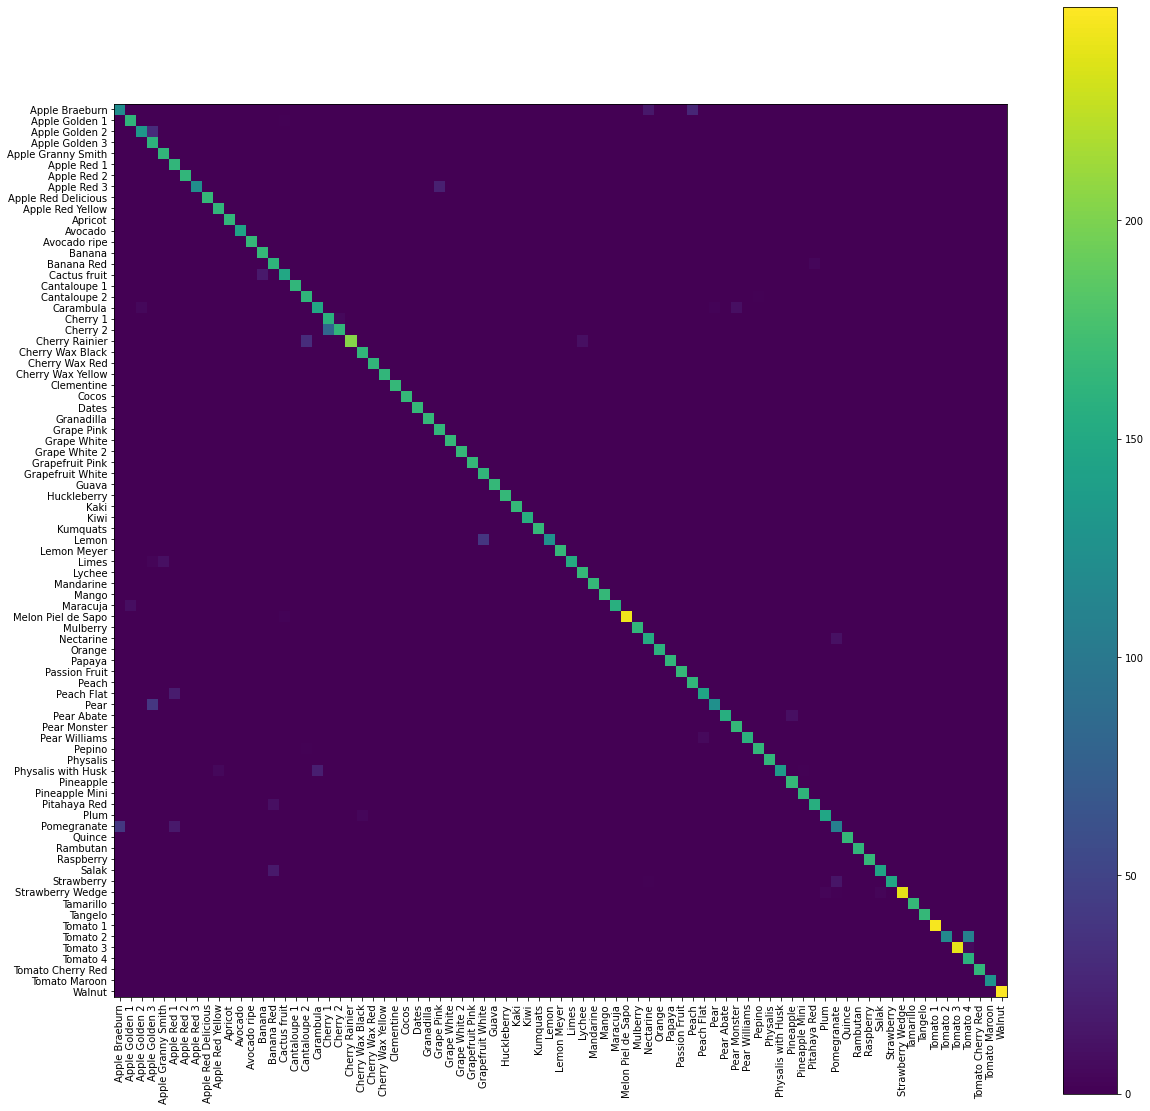

In [12]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
from keras.models import load_model 

img_rows,img_height,img_depth = 28,28,3
model = load_model("fruits_fresh_cnn.h5")

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 41322
nb_validation_samples = 13877

#Confusion matrix and classification report
y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(y_pred,axis=1)

print('Confusion_matrix\n\n')

cnf_matrix =confusion_matrix(validation_generator.classes, y_pred)
print(cnf_matrix)

#plotting
plt.figure(figsize=(20,20))

plt.imshow(cnf_matrix,interpolation='nearest')

plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)


## Displying our confusion matrrix

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

#Confusion matrix and classification report
y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(y_pred,axis=1)

print('Confusion_matrix\n\n')

cnf_matrix =confusion_matrix(validation_generator.classes, y_pred)
print(cnf_matrix)

print('classification_report')
target_names = list(class_labels.values())

print(classification_report(validation_generator.classes,y_pred,target_names=target_names))


Confusion_matrix


[[121   0   0 ...   0   0   0]
 [  0 163   0 ...   0   0   0]
 [  0   0 132 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]
classification_report
                     precision    recall  f1-score   support

     Apple Braeburn       0.75      0.74      0.74       164
     Apple Golden 1       0.95      0.99      0.97       164
     Apple Golden 2       0.96      0.80      0.88       164
     Apple Golden 3       0.69      1.00      0.81       161
 Apple Granny Smith       0.94      1.00      0.97       164
        Apple Red 1       0.82      1.00      0.90       164
        Apple Red 2       1.00      1.00      1.00       164
        Apple Red 3       1.00      0.85      0.92       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       0.97      1.00      0.98       164
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00    

### Testing our classifier

In [20]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 32, 32


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = './fruits-360/validation/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = np.argmax(model.predict(images, batch_size = 10),axis = 1)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
! git add Fruit_classifier.ipynb fruits_fresh_cnn.h5 fruit_classifier.pickle
! git commit -m "13:17/02-05-2021"
! git push origin main